In [8]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import random
random.seed(3)

targetUrl_heartDiseaseClassificationDataset="https://raw.githubusercontent.com/Minon98/Python/main/heart%20disease%20classification%20dataset.csv"
df = pd.read_csv(targetUrl_heartDiseaseClassificationDataset)

df=df.fillna(df.mean())
df = pd.get_dummies(df)

df_scale = df.copy()
df_scale.drop(['sex_female', 'sex_male', 'target_no', 'target_yes'], axis=1, inplace=True)

scaler = StandardScaler()
scaler.fit(df_scale)
df_scaled = scaler.transform(df_scale)
df_scaled = pd.DataFrame(data=df_scaled, columns=df_scale.columns)

df_heart = pd.concat([df_scaled,df['sex_male']],axis=1)
df_heart = pd.concat([df_heart,df['sex_female']],axis=1)

X = df_heart.iloc[:, 1:16]
y = df.iloc[:, 14:16]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = Sequential()
model.add(Dense(32, input_dim=14, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

es = EarlyStopping(monitor='val_accuracy',verbose = 1, patience = 20, mode = 'max')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=2000, batch_size=10, validation_split=0.2, callbacks=[es])

Epoch 1/2000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  from ipykernel import kernelapp as app


22/22 [==============================] - 1s 14ms/step - loss: 0.8979 - accuracy: 0.4286 - val_loss: 0.7079 - val_accuracy: 0.6909
Epoch 2/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7855 - accuracy: 0.6544 - val_loss: 0.6936 - val_accuracy: 0.8000
Epoch 3/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8072 - accuracy: 0.6682 - val_loss: 0.6861 - val_accuracy: 0.8000
Epoch 4/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8074 - accuracy: 0.7373 - val_loss: 0.6775 - val_accuracy: 0.8182
Epoch 5/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7765 - accuracy: 0.7327 - val_loss: 0.6737 - val_accuracy: 0.8182
Epoch 6/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.7586 - accuracy: 0.7696 - val_loss: 0.6686 - val_accuracy: 0.8364
Epoch 7/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7663 - accuracy: 0.7604 - val_loss: 0.6668 - val_accuracy: 0.8364
Epoch 8/2000
22/22

In [9]:
from sklearn.model_selection import KFold

k = 6
kfold = KFold(n_splits=k, shuffle=True)
acc_score=[]

for train_index, test_index in kfold.split(X):
  X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

accuracy = model.evaluate(X_test, y_test)[1]
acc_score.append(accuracy)

#k번 실시된 acc의 avg
avg_acc_score = sum(acc_score) / k

print('acc: ', acc_score)
print('acc_avg: ', avg_acc_score)

2/2 [==============================] - 0s 9ms/step - loss: 1.1438 - accuracy: 0.6400
acc:  [0.6399999856948853]
acc_avg:  0.10666666428248088


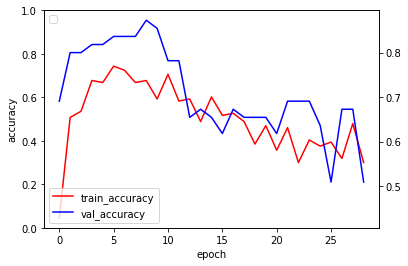

In [10]:
import numpy as np

fig, accuracy_ax = plt.subplots()
acc_ax = accuracy_ax.twinx()


acc_ax.plot(history.history['accuracy'], 'r', label = 'train_accuracy') 
acc_ax.plot(history.history['val_accuracy'], 'b', label = 'val_accuracy')

accuracy_ax.set_xlabel('epoch')
accuracy_ax.set_ylabel('accuracy')

accuracy_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()